# Análise do Dataset Car Crash

Este notebook realiza análises e visualizações utilizando o dataset **Car Crash**.
Nosso roteiro:
1. **Compreensão Inicial dos Dados**
   - Carregar e visualizar o dataset
   - Resumo estatístico

2. **Análise Univariada**
   - Distribuições das variáveis numéricas
   - Boxplots

3. **Análise Bivariada**
   - Gráficos de dispersão (Scatter plots)
   - Pairplots

4. **Análise Multivariada**
   - Gráficos tridimensionais
   - Heatmap de correlação

5. **Conclusões e Insights**

In [24]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Compreensão Inicial dos Dados


## Carregar o Dataset e Visualizar os Dados

In [8]:
# Carregar o dataset Iris do seaborn
car_crashes = sns.load_dataset("car_crashes")

# Exibir as 5 primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
print(car_crashes.head())

Primeiras 5 linhas do dataset:
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


In [9]:
# Informações sobre tipos de dados e valores nulos
print("\nInformações do DataFrame:")
print(car_crashes.info())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB
None


**Consultando dados nulos ou Missing Values no Dataframe**


In [10]:
# Verificar valores nulos em cada coluna
print("\nValores nulos por coluna:")
print(car_crashes.isnull().sum())


Valores nulos por coluna:
total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64


## Tipo do Objeto carregado

In [11]:
type(car_crashes)

pandas.core.frame.DataFrame

## Estatísticas Descritivas

In [12]:
# Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas:")
print(car_crashes.describe())


Estatísticas descritivas:
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


## Lista dos Estados do dataset


In [13]:
car_crashes['abbrev'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

## Filtrar Dados: Acidentes relacionados a imprudência de trânsito 

In [14]:
# speeding (excesso de velocidade)
# alcohol (álcool ao volante)

# Filtrar apenas estados com acidentes por excesso de velocidade (speeding) acima de 7
imprudentes_speeding = car_crashes[car_crashes['speeding'] > 7]
print("Estados com acidentes por excesso de velocidade (speeding) acima de 7:")
print(imprudentes_speeding[['abbrev', 'speeding']])

# Filtrar apenas estados com acidentes por álcool (alcohol) acima de 7
imprudentes_alcohol = car_crashes[car_crashes['alcohol'] > 7]
print("\nEstados com acidentes por álcool (alcohol) acima de 7:")
print(imprudentes_alcohol[['abbrev', 'alcohol']])

Estados com acidentes por excesso de velocidade (speeding) acima de 7:
   abbrev  speeding
0      AL     7.332
1      AK     7.421
11     HI     9.450
18     LA     7.175
26     MT     8.346
38     PA     9.100
40     SC     9.082
43     TX     7.760
48     WV     8.092
50     WY     7.308

Estados com acidentes por álcool (alcohol) acima de 7:
   abbrev  alcohol
11     HI    7.175
26     MT    9.416
34     ND   10.038
40     SC    9.799
43     TX    7.372


# 2. Análise Univariada

## Distribuições das variáveis numéricas para acidentes de causas imprudentes

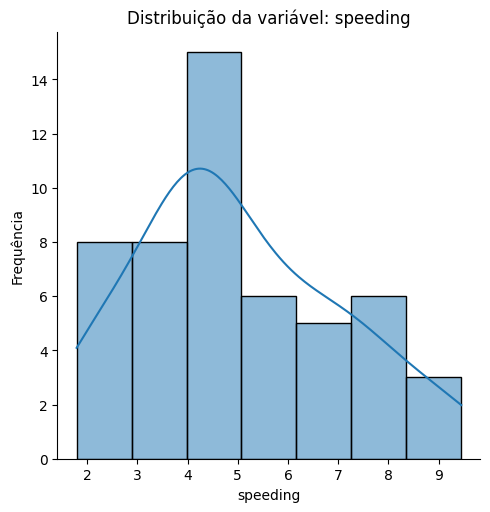

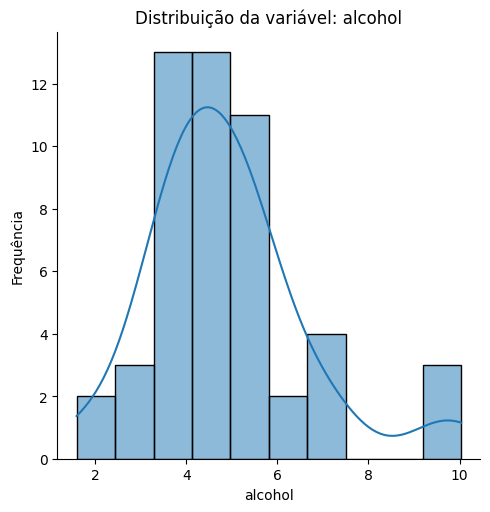

In [15]:
# Análise Univariada: Distribuições das variáveis numéricas usando displot

variaveis_numericas = [ 'speeding', 'alcohol']

for var in variaveis_numericas:
    sns.displot(car_crashes[var], kde=True)
    plt.title(f'Distribuição da variável: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Conclusão da Análise Univariada — Acidentes por Causas Imprudentes (`car_crashes`)

Esta análise univariada teve como foco as variáveis numéricas relacionadas a **comportamentos imprudentes** no trânsito: `speeding` (excesso de velocidade) e `alcohol` (uso de álcool ao volante). A seguir, detalhamos os principais achados com base nas distribuições dessas variáveis.

---

## 1. Excesso de Velocidade (`speeding`)

- A distribuição mostra uma **concentração entre os valores 3 e 6**, com pico próximo de **4 a 5**.
- A curva apresenta **leve assimetria positiva**, com cauda se estendendo até valores acima de 9.
- Estados com proporções mais altas de acidentes por velocidade são **menos frequentes**, mas merecem atenção especial.
- A presença de uma curva de densidade indica que a maioria dos casos se mantém em um padrão moderado, sugerindo **comportamento comum** entre os estados.

*Conclusão*: O excesso de velocidade é uma causa significativa de acidentes, com maior frequência em níveis moderados, mas com **alguns casos extremos** que devem ser analisados individualmente.

---

## 2. Uso de Álcool ao Volante (`alcohol`)

- A distribuição é semelhante à de `speeding`, mas com um **pico mais pronunciado entre 3 e 5**.
- Apresenta uma **curva mais simétrica**, indicando menor variação entre os estados.
- A cauda direita, embora presente, é menos acentuada, mostrando que poucos estados têm proporções muito altas de acidentes relacionados ao álcool.

*Conclusão*: O álcool ao volante se destaca como uma **causa frequente e homogênea** de acidentes. Sua baixa dispersão sugere que **ações padronizadas de prevenção** podem ser eficazes em escala nacional.

---

## Considerações Finais

- Ambas as variáveis apresentam distribuições **concentradas em níveis intermediários**, com **alguns outliers** em estados mais problemáticos.
- O padrão geral indica que **ações de prevenção e fiscalização** voltadas para o comportamento imprudente têm potencial para reduzir significativamente os índices de acidentes.
- A análise univariada fornece **uma base sólida para análises futuras**, como relações com número de mortes, feridos ou comparações regionais.


### BoxPlot:Distribuição das Proporções por Fator de Risco

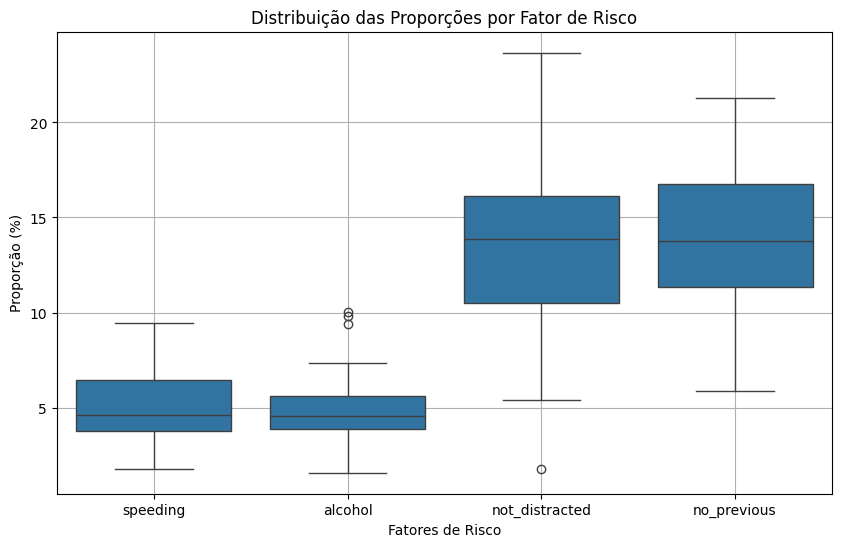

In [27]:
# Reformatar dados para o formato "longo"
df_melted = car_crashes.melt(
    value_vars=['speeding', 'alcohol', 'not_distracted', 'no_previous'],
    var_name='Fator de Risco',
    value_name='Proporção'
)

# Gerar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fator de Risco', y='Proporção', data=df_melted)
plt.title('Distribuição das Proporções por Fator de Risco')
plt.ylabel('Proporção (%)')
plt.xlabel('Fatores de Risco')
plt.grid(True)
plt.show()

##  Conclusão do Boxplot: Distribuição das Proporções por Fator de Risco

O gráfico boxplot compara a **distribuição estatística** dos principais fatores de risco para acidentes de trânsito entre os estados dos EUA, com base no dataset `car_crashes`.

---

###  Observações por Fator:

- **`speeding` (excesso de velocidade)**:
  - Apresenta **baixa mediana** (~5%) e **dispersão moderada**.
  - A maioria dos estados está concentrada entre 3% e 7%.
  - Poucos **outliers**, indicando comportamento relativamente homogêneo entre os estados.

- **`alcohol` (álcool ao volante)**:
  - Semelhante a `speeding` em termos de mediana e dispersão.
  - Há alguns **outliers positivos**, sugerindo que alguns estados possuem taxas significativamente mais altas de acidentes envolvendo álcool.

- **`not_distracted` (sem distração)**:
  - **Maior dispersão** entre os fatores.
  - Mediana em torno de 14% e valores que vão de ~5% a mais de 22%.
  - Muitos **outliers e cauda longa**, indicando alta variabilidade entre os estados.
  - Pode refletir **diferenças na forma como os acidentes são categorizados** ou nas campanhas contra distração.

- **`no_previous` (motoristas sem histórico de acidentes)**:
  - Também com **alta dispersão** e **mediana elevada** (~15%).
  - Estados variam bastante na proporção de condutores sem registros anteriores, o que pode refletir **diferenças populacionais, políticas de habilitação ou comportamento geral de condução**.

---

###  Conclusão Geral:

- Os fatores de risco `speeding` e `alcohol` apresentam **distribuições mais concentradas**, o que sugere **comportamentos de risco consistentes entre os estados**.
- Já `not_distracted` e `no_previous` apresentam **maior variabilidade**, indicando que **o perfil dos condutores e as causas atribuídas aos acidentes variam bastante por estado**.
- A presença de **outliers em todos os fatores**, principalmente em `alcohol` e `not_distracted`, aponta para **estados com situações excepcionais**, que merecem atenção em políticas públicas ou campanhas educativas específicas.

O boxplot, portanto, é útil para identificar **disparidades regionais**, padrões gerais de comportamento e **prioridades na gestão de risco no trânsito**.



### Gráfico de densidade (sns.kdeplot) para todos os tipos de acidentes

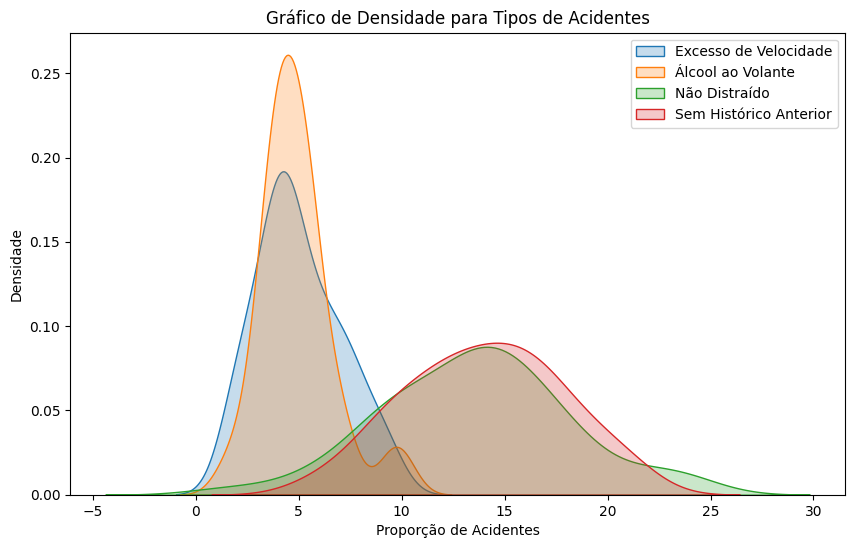

In [16]:
# Gráfico de densidade (sns.kdeplot) para todos os tipos de acidentes

plt.figure(figsize=(10,6))
sns.kdeplot(car_crashes['speeding'], label='Excesso de Velocidade', fill=True)
sns.kdeplot(car_crashes['alcohol'], label='Álcool ao Volante', fill=True)
sns.kdeplot(car_crashes['not_distracted'], label='Não Distraído', fill=True)
sns.kdeplot(car_crashes['no_previous'], label='Sem Histórico Anterior', fill=True)
plt.title('Gráfico de Densidade para Tipos de Acidentes')
plt.xlabel('Proporção de Acidentes')
plt.ylabel('Densidade')
plt.legend()
plt.show()


##  Conclusão do Gráfico de Densidade (`sns.kdeplot`) — Análise por Tipo de Acidente

O gráfico de densidade apresentado fornece uma visão comparativa da distribuição proporcional de acidentes de trânsito com base em diferentes **tipos de causas** no dataset `car_crashes`.
##  Interpretações por Variável

###  **Excesso de Velocidade (`speeding`)**
- A distribuição apresenta um **pico de densidade entre 4 e 6** na proporção de acidentes.
- A curva é **ligeiramente assimétrica à direita**, sugerindo que a maioria dos estados tem proporções moderadas de acidentes por excesso de velocidade.
- Há poucos estados com valores extremos (proporção > 10), o que indica que esse comportamento é mais controlado em boa parte do país.

###  **Álcool ao Volante (`alcohol`)**
- Essa variável apresenta a curva de densidade **mais estreita e elevada**, com um **pico acentuado entre 4 e 5**.
- Isso indica uma **alta concentração** de estados com taxas semelhantes de acidentes envolvendo álcool.
- A menor dispersão sugere que o consumo de álcool ao volante tem um comportamento mais uniforme entre os estados analisados.

###  **Não Distraído (`not_distracted`)**
- A distribuição é **mais ampla e plana**, indicando uma **grande variabilidade** entre os estados.
- Muitos estados possuem **proporções altas (acima de 10)** para essa variável, o que pode indicar que distrações são menos relatadas ou medidas como causa primária.
- A curva mostra uma presença significativa mesmo em **valores mais elevados (até 25)**.

###  **Sem Histórico Anterior (`no_previous`)**
- A curva é bastante similar à de `not_distracted`, com valores elevados ao longo da escala.
- Aponta para um número considerável de acidentes ocorrendo com motoristas **sem histórico anterior**, o que pode indicar **ocorrências isoladas** ou **imprevisíveis**.
- Também apresenta maior densidade entre **10 e 15**, sugerindo que é uma condição comum.

---

##  Conclusão Geral

- As causas **“Excesso de Velocidade”** e **“Álcool ao Volante”** apresentam distribuições mais **concentradas e previsíveis**, o que facilita a criação de **políticas padronizadas de prevenção**.
- Já as variáveis **“Não Distraído”** e **“Sem Histórico Anterior”** têm **distribuições mais dispersas**, revelando **heterogeneidade entre os estados** e uma possível **subnotificação ou complexidade na identificação das causas reais**.
- A análise revela que **comportamentos individuais e fatores humanos** ainda representam uma parcela importante e diversificada das causas de acidentes.




### Histograma

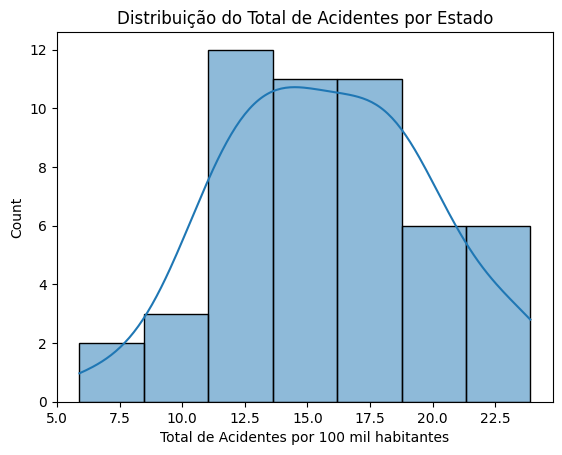

In [17]:
# Histograma para a variável 'total' (acidentes por 100 mil habitantes)
sns.histplot(car_crashes['total'], kde=True)
plt.title('Distribuição do Total de Acidentes por Estado')
plt.xlabel('Total de Acidentes por 100 mil habitantes')
plt.show()

#  Conclusão da Análise Univariada — Total de Acidentes por Estado (`car_crashes`)

A análise da variável `total`, que representa o **número total de acidentes de trânsito por 100 mil habitantes em cada estado**, foi realizada por meio de um **histograma com curva de densidade** (KDE). A seguir, são apresentadas as principais observações:

---

## Distribuição Geral da Variável `total`

- A distribuição é **moderadamente simétrica**, mas com leve viés à direita (assimetria positiva), indicando que a maioria dos estados apresenta **níveis de acidentes entre 12 e 18 por 100 mil habitantes**.
- O **pico de frequência** (moda) ocorre na faixa entre **12 e 14 acidentes**, representando a concentração mais comum entre os estados.
- Há estados com valores **abaixo de 10** (poucos acidentes por 100 mil habitantes) e **acima de 20**, indicando **variação significativa** nas taxas de acidentes.
- A curva KDE mostra uma distribuição relativamente suave, com **tendência decrescente** a partir do valor modal.

---

## Conclusões Importantes

- A maioria dos estados apresenta **níveis intermediários de acidentes**, sugerindo um padrão nacional moderado.
- A presença de **outliers positivos** (valores acima de 20 acidentes por 100 mil habitantes) indica que **alguns estados enfrentam desafios específicos** que devem ser investigados mais a fundo.
- Estados com taxas mais baixas podem servir de referência para **boas práticas** e **modelos de prevenção eficazes**.


# 3. Análise Bivariada

## Gráfico de Dispersão:


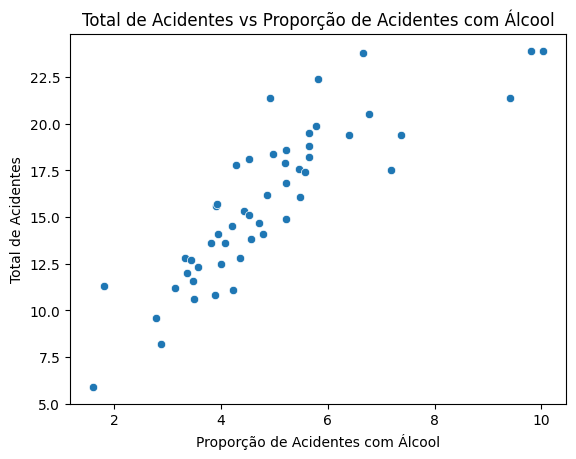

In [21]:
# Gerar o gráfico de dispersão
sns.scatterplot(data=car_crashes, x='alcohol', y='total')

# Configurações dos rótulos e título
plt.title('Total de Acidentes vs Proporção de Acidentes com Álcool')
plt.xlabel('Proporção de Acidentes com Álcool')
plt.ylabel('Total de Acidentes')

# Exibir o gráfico
plt.show()

## Conclusão do Gráfico de Dispersão:



O gráfico de dispersão entre a **proporção de acidentes com álcool** e o **total de acidentes por estado** revela uma relação clara entre essas duas variáveis.

### Observações:

- **Correlação Positiva Forte**: Há uma tendência visivelmente **positiva** entre os pontos — ou seja, estados com **maior proporção de acidentes envolvendo álcool** tendem também a registrar **mais acidentes no total**.
  
- **Alinhamento Linear dos Dados**: A disposição dos pontos sugere que o **álcool é um fator importante e consistente** no aumento do número de acidentes. Isso reforça a hipótese de que o consumo de álcool ao volante impacta diretamente o volume de sinistros.

- **Poucos Outliers**: A maioria dos dados segue uma linha de tendência bem definida, com poucos desvios significativos, o que reforça a força dessa relação.

---


### Conclusão Geral:

A análise indica que o **álcool tem forte impacto sobre o total de acidentes** registrados nos estados. Essa evidência pode servir de base para:

- **Campanhas mais intensas de prevenção ao álcool ao volante**;
- **Reforço da fiscalização** em estados com alta proporção de acidentes com álcool;
- **Formulação de políticas públicas** que busquem reduzir essa causa específica de sinistros.

A relação direta e clara entre essas variáveis destaca o álcool como um dos **principais fatores de risco no trânsito**.



## Pairplot: Relações Entre Todas as Variáveis Numéricas


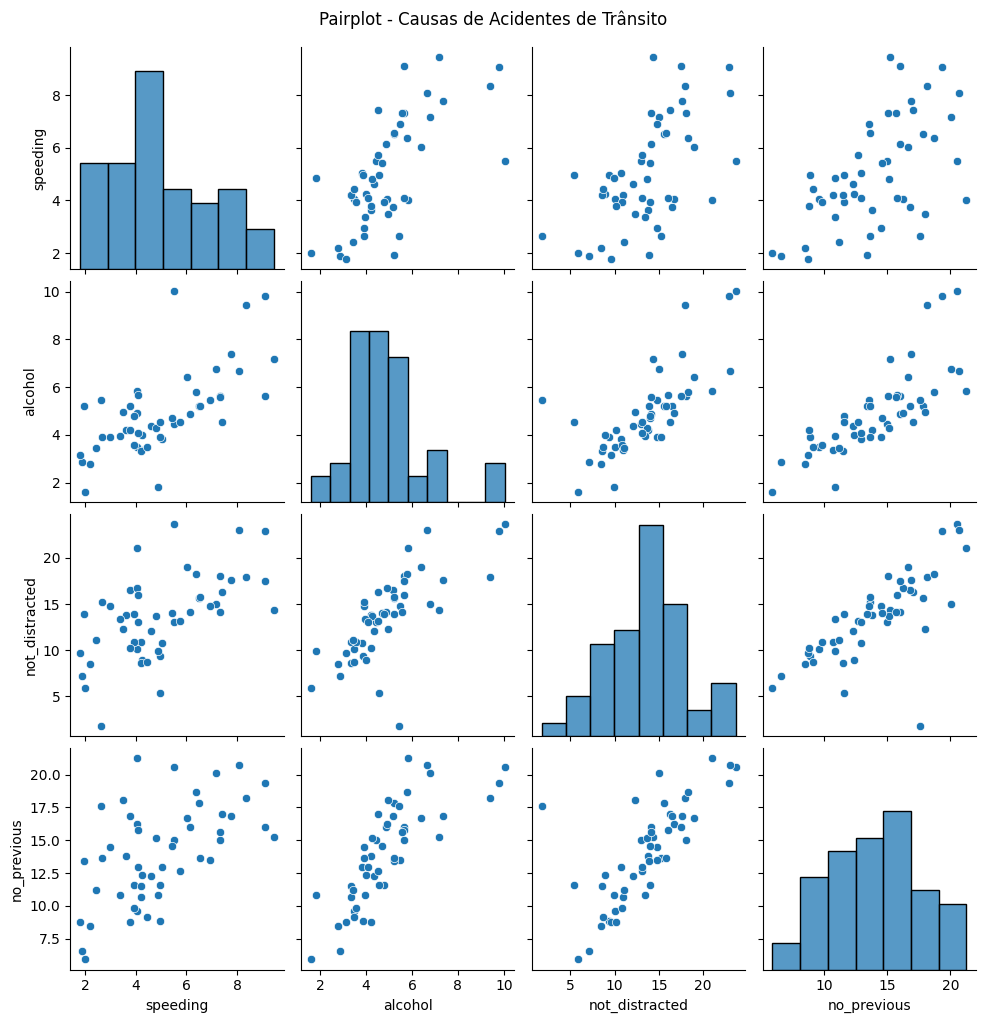

In [22]:
# Gerar o pairplot com as causas de acidentes
sns.pairplot(car_crashes[['speeding', 'alcohol', 'not_distracted', 'no_previous']])

# Título geral do gráfico
plt.suptitle("Pairplot - Causas de Acidentes de Trânsito", y=1.02)
plt.show()

##  Conclusões do Pairplot: Causas de Acidentes de Trânsito

A análise do `pairplot` com as variáveis `speeding`, `alcohol`, `not_distracted` e `no_previous` revela informações importantes sobre os padrões e relações entre diferentes causas de acidentes de trânsito.

---

### Relações entre Variáveis

- **`speeding` vs `alcohol`**: Observa-se uma **correlação positiva moderada**. Isso sugere que, em muitos estados, o excesso de velocidade e o consumo de álcool são comportamentos de risco que ocorrem juntos, reforçando a ideia de perfis de motoristas com múltiplos fatores de risco.

- **`no_previous` vs `not_distracted`**: Também há uma **correlação positiva**, indicando que estados com mais motoristas sem histórico de acidentes tendem a registrar maior proporção de acidentes em que a distração não foi fator. Pode indicar que mesmo motoristas "cuidadosos" ou com bom histórico estão envolvidos em acidentes não relacionados à distração.

- As demais combinações (ex: `alcohol` vs `not_distracted`, `speeding` vs `no_previous`) mostram **correlações fracas ou dispersão elevada**, o que indica ausência de relação linear direta entre essas variáveis.

---

### Distribuições Individuais

- **`speeding` e `alcohol`**: Distribuições assimétricas à direita, com a maioria dos estados em faixas mais baixas e poucos com valores muito elevados. Isso sugere que a maioria dos estados tem proporções moderadas dessas causas, mas há exceções críticas.

- **`not_distracted` e `no_previous`**: Distribuições mais simétricas, indicando uma presença mais homogênea dessas variáveis entre os estados.

---

###  Outliers

- Há alguns pontos visivelmente fora do padrão em variáveis como `alcohol` e `no_previous`, indicando **estados com características muito específicas**, como taxas extremamente altas de acidentes envolvendo álcool ou muitos motoristas sem histórico de acidentes.

---

###  Conclusão Geral

O pairplot permite visualizar que algumas **causas de acidentes estão relacionadas entre si**, especialmente `speeding` e `alcohol`. Já variáveis como `not_distracted` e `no_previous` parecem estar mais associadas a padrões demográficos ou estruturais dos estados, com menos conexão direta com os outros fatores.

Essa análise é útil para:
- **Planejamento de campanhas específicas**, por exemplo, em estados onde álcool e velocidade ocorrem juntos.
- **Avaliação de comportamento de motoristas**, considerando múltiplas variáveis ao mesmo tempo.
- **Identificação de perfis de risco complexos**, além de causas isoladas.



# 4. Análise Multivariada

## Gráfico Tridimensional: Total, Álcool e Velocidade:


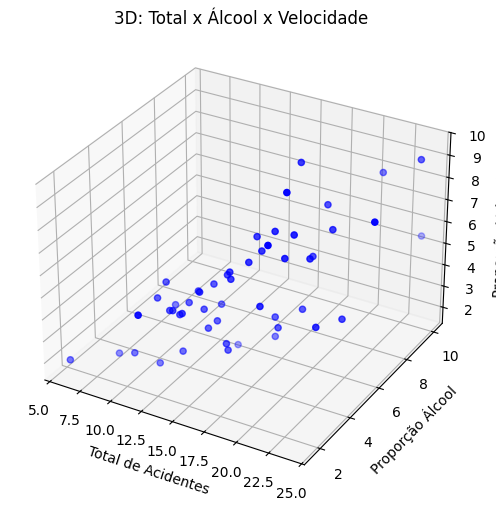

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(car_crashes['total'], car_crashes['alcohol'], car_crashes['speeding'], c='blue')
ax.set_xlabel('Total de Acidentes')
ax.set_ylabel('Proporção Álcool')
ax.set_zlabel('Proporção Velocidade')
plt.title('3D: Total x Álcool x Velocidade')
plt.show()



## Conclusão da Análise Multivariada 3D: Total de Acidentes x Álcool x Velocidade

A visualização tridimensional revela como o total de acidentes se comporta em relação à combinação de dois fatores críticos: a **proporção de acidentes envolvendo álcool** e a **proporção de acidentes causados por excesso de velocidade**.

---

###Observações Relevantes:

- **Tendência de associação positiva**: De forma geral, é possível observar que **à medida que aumentam os valores de `alcohol` e `speeding`, o número total de acidentes (`total`) também tende a ser maior**. Isso sugere uma interação clara entre esses fatores de risco.

- **Agrupamento central**: A maioria dos estados está concentrada em uma região intermediária do gráfico, onde os valores de `alcohol` variam entre 3 e 6, e `speeding` entre 4 e 6, com `total` entre 12 e 20. Esses estados podem representar uma faixa de risco "média", mas ainda significativa.

- **Casos extremos (outliers)**: Alguns pontos apresentam valores altos em todas as dimensões — alta velocidade, alto álcool e alto número de acidentes. Esses casos extremos devem ser investigados mais a fundo, pois podem indicar **falhas na fiscalização, infraestrutura ou cultura de risco local**.

- **Falta de casos com alto álcool e baixa velocidade** (ou vice-versa) com alto total de acidentes reforça a hipótese de que **a combinação dos dois fatores** tem impacto mais expressivo do que cada um isoladamente.

---

### Conclusão Geral:

A análise multivariada demonstra que **a interação entre álcool e velocidade é um forte indicativo de risco aumentado no trânsito**. Estados com altos índices nessas variáveis tendem a registrar um número elevado de acidentes.

Essa evidência reforça a importância de **intervenções simultâneas**, como:
- Campanhas integradas contra o álcool e o excesso de velocidade;
- Aumento da fiscalização em locais com múltiplos comportamentos de risco;
- Estratégias específicas para estados com padrões fora da média.

A abordagem multivariada fornece uma **visão mais realista e completa do risco**, revelando como fatores interagem entre si e afetam os resultados de segurança viária.



## Heatmap de correlação:


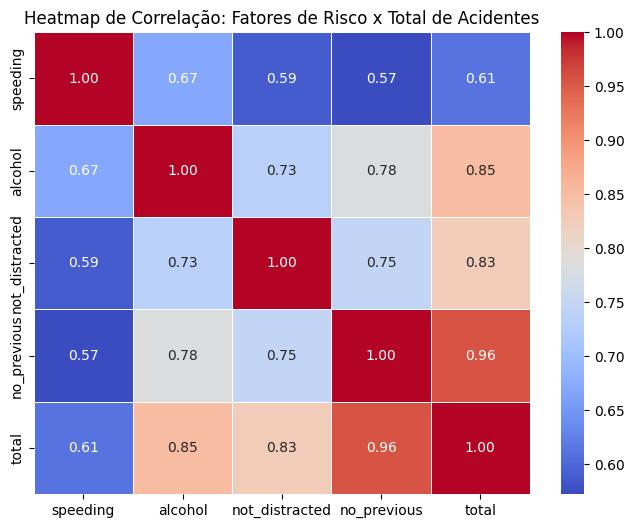

In [26]:
# Selecionar apenas as colunas de interesse
colunas = ['speeding', 'alcohol', 'not_distracted', 'no_previous', 'total']
df_selecionado = car_crashes[colunas]

# Calcular a matriz de correlação
corr = df_selecionado.corr()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlação: Fatores de Risco x Total de Acidentes')
plt.show()

## Conclusão do Heatmap de Correlação: Fatores de Risco vs Total de Acidentes

O heatmap de correlação apresenta as **relações estatísticas entre variáveis quantitativas** do dataset `car_crashes`, com foco em fatores de risco de acidentes (`speeding`, `alcohol`, `not_distracted`, `no_previous`) e o **número total de acidentes (`total`)**.

---

### Principais Observações:

- **`no_previous` vs `total` → correlação de 0.96**  
  Essa é a correlação mais forte do heatmap, indicando que estados com maior número de motoristas sem histórico de acidentes também apresentam um número maior de acidentes totais. Isso pode refletir estados com **maior número absoluto de motoristas**, e não necessariamente maior risco individual.

- **`alcohol` vs `total` → correlação de 0.85**  
  Mostra que a **proporção de acidentes com álcool é fortemente associada ao total de acidentes**

- **`not_distracted` vs `total` → correlação de 0.83**  
  Apesar de parecer contraintuitivo, essa correlação indica que, em estados com mais acidentes, muitos não foram causados por distração — sugerindo que **outras causas (como álcool e velocidade)** predominam nesses locais.

- **`speeding` vs `total` → correlação de 0.61**  
  A correlação é **moderada**, indicando que o excesso de velocidade tem influência relevante, mas menor que o álcool e o histórico dos condutores.

---

###  Relações entre os Fatores de Risco

- `alcohol`, `not_distracted` e `no_previous` estão todos **positivamente correlacionados entre si** (correlações entre 0.73 e 0.78), indicando que estados com alta proporção de um desses fatores tendem a ter altos valores nos outros também.

- `speeding` apresenta correlações mais baixas em comparação com os demais, o que pode indicar que esse comportamento ocorre de forma **mais independente**.

---

### Conclusão Geral

O heatmap revela que o **total de acidentes está fortemente relacionado a múltiplos fatores de risco**, especialmente:
- **Histórico dos condutores (`no_previous`)**
- **Acidentes com álcool**
- **Acidentes sem distração** (sugerindo outras causas)

